In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas_profiling import ProfileReport

## Loading data

In [14]:
# loading data
data_frame = pd.read_csv('../csv_data/train.csv', sep = ',')
data_frame.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


## Check data duplicated

In [3]:
# check that there are no duplicated data comparing lenght of original data vs the subset 'id' with drop duplicated. If True all ok, if False there are duplicated data.
print(len(data_frame.drop_duplicates(subset=['Id'], inplace = False)) == len(data_frame)) 

True


## Creating pandas profiling on folder reports

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/pandas_profiling/model/correlations.py:55: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(
/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/missingno/missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculati

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

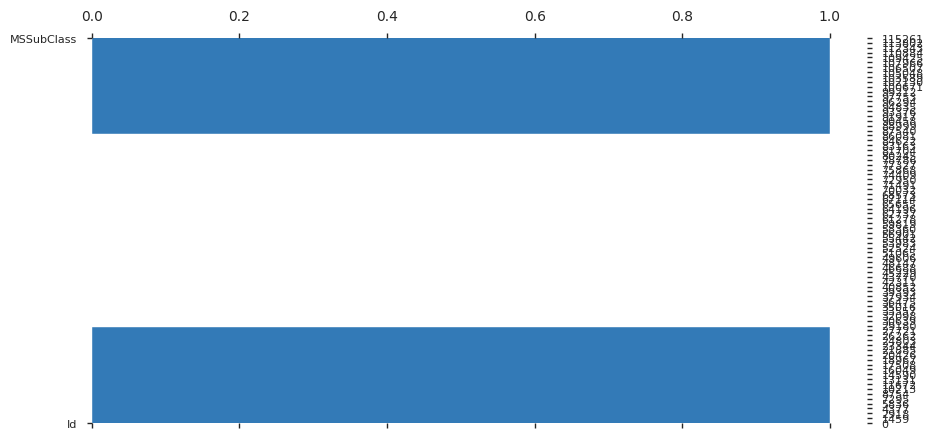

In [4]:
# pandas profiling
profile = ProfileReport(data_frame, title = 'Pandas Profiling Report')
# profile to widgets
# profile.to_widgets()

# profile to html
# profile.to_notebook_iframe()

# exporting profile to a external file. Best option
profile.to_file('../reports/your_report.html')

## Fixing columns with 0s that are not correctly marked as missing values

In [5]:
# select manually the columns with numerical or categorical data to change 0 with NaN
zeros_col_list = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '2ndFlrSF', 'LowQualFinSF', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal']

# replace categorial or numerical 0s with Nan
data_frame[zeros_col_list] = data_frame[zeros_col_list].replace({'0' : np.nan, 0 : np.nan})

## New profile with no 0s

In [6]:
# pandas profiling
profile_no_zeros = ProfileReport(data_frame, title = 'Pandas Profiling Report')

# exporting profile to a external file. Best option
profile_no_zeros.to_file('../reports/your_report_no_zeros.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/pandas_profiling/model/correlations.py:55: UserWarning: There was an attempt to calculate the cramers correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"cramers": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'No data; `observed` has size 0.')
  warnings.warn(
/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/missingno/missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculati

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

# Removing columns with a give ratio of NaN values

In [7]:
# if we set a threshold of 0.3 we are removing columns with Nan ratio of 70%
data_frame_clean = data_frame.dropna(axis=1, thresh = int(0.3 * data_frame.shape[0]))

# New Pandas profiling with colums removed

In [8]:
# pandas profiling
profile_removed_na_columns = ProfileReport(data_frame_clean, title = 'Pandas Profiling Report')

# exporting profile to a external file. Best option
profile_removed_na_columns.to_file('../reports/your_report_removed_na_columns.html')

/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/multimethod/__init__.py:312: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/missingno/missingno.py:254: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(
/Users/hectorcozar/Documents/GitHub/templates/venv/lib/python3.9/site-packages/pandas_profiling/model/missing.py:89: UserWarning: There was an attempt to generate the Count missing values diagrams, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(missing_diagrams={"Count": False}`)
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/pandas-profiling/issues
(include the error message: 'The number of FixedLocator locations (7), usually from a call to set_ticks, does not match the number of ticklabels (69).')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

## Storing cleaned dataframe

In [9]:
%store data_frame_clean

Stored 'data_frame_clean' (DataFrame)
